## RECOMMENDATION SYSTEM IN PYTHON

#### This project turns to do a simple  recommendation task on a given dataset(movie.csv && rating.csv)

## PROJECT ROADMAP
### 1. Importing labraries
### 2. importing Packages
### 3. Loading the Datasets
### 4. Visualising the ratiing dataset
### 5. Spliting the rating dataset into training and testing model
### 6. Performing Linear Regression on the rating dataset using the rating and movieId
### 7. Performing the recommendation task and also using KNN for the model evaluation.
### 8. to be continued with other ML Algorithms

## Libraries and Packages used: 
### 1. Pandas
### 2. Numpy
### 3. Scikit-Learn
### 4. Seaborn
### 5. Matplotlib
### 6. K NearestNeighbors
### 7. Regressor

In [84]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
 

In [52]:
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<AxesSubplot:>

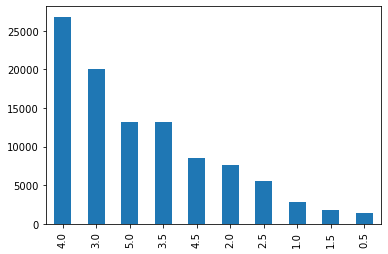

In [53]:
df['rating'].value_counts().plot(kind ="bar")

In [54]:
 df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [55]:
 df['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
320      20
569      20
442      20
257      20
406      20
Name: userId, Length: 610, dtype: int64

In [56]:
df['userId']

0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64

# Regression Aspect

#### using the movieId and the rating 

In [57]:
df['movieId']

0              1
1              3
2              6
3             47
4             50
           ...  
100831    166534
100832    168248
100833    168250
100834    168252
100835    170875
Name: movieId, Length: 100836, dtype: int64

In [58]:
df['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [59]:
X = df[['rating']]
X.shape

(100836, 1)

In [60]:
y=df[['movieId']]
y.shape

(100836, 1)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2)

In [63]:
X_train.shape

(80668, 1)

In [64]:
X_test.shape

(20168, 1)

In [65]:
y_train.shape

(80668, 1)

In [66]:
y_test.shape

(20168, 1)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
regressor = LinearRegression(fit_intercept=True)

In [69]:
regressor.fit(X_train,y_train)

LinearRegression()

In [70]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff (m):', regressor.intercept_)


Linear Model Coeff (m): [[-106.24268841]]
Linear Model Coeff (m): [19815.36716991]


In [71]:
y_predict = regressor.predict(X_test)
y_predict

array([[19337.27507205],
       [19549.76044888],
       [19762.24582571],
       ...,
       [19496.63910467],
       [19284.15372785],
       [19443.51776047]])

In [72]:
y_test

,movieId
25602,56788
50128,440
31909,8371
49570,70533
98885,1288
...,...
96809,3018
36137,70286
61449,1255
29522,1259


In [73]:
df.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [74]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [75]:
n_df = len(df)
n_movies = len(df['movieId'].unique())
n_users = len(df['userId'].unique())

print(f"Number of ratings: {n_df}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per movie: {round(n_df/n_movies, 2)}")
print(f"Average ratings per user: {round(n_df/n_users, 2)}")



Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average ratings per movie: 10.37
Average ratings per user: 165.3


In [76]:
user_freq = df[['userId', 'movieId']].groupby(
	'userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
print(user_freq.head())


   userId  n_ratings
0       1        232
1       2         29
2       3         39
3       4        216
4       5         44


In [77]:
df.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [78]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [79]:
 
mean_rating = ratings.groupby('movieId')[['rating']].mean()
 
lowest_rated = mean_rating['rating'].idxmin()
movies.loc[movies['movieId'] == lowest_rated]
 
highest_rated = mean_rating['rating'].idxmax()
movies.loc[movies['movieId'] == highest_rated]
# show number of people who rated movies rated movie highest
ratings[ratings['movieId']==highest_rated]
# show number of people who rated movies rated movie lowest
ratings[ratings['movieId']==lowest_rated]

## the above movies has very low dataset. We will use bayesian average
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()


In [80]:
 
from scipy.sparse import csr_matrix

def create_matrix(df):
	
	N = len(df['userId'].unique())
	M = len(df['movieId'].unique())
	
 
	user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
	movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
	
 
	user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
	movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
	
	user_index = [user_mapper[i] for i in df['userId']]
	movie_index = [movie_mapper[i] for i in df['movieId']]

	X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
	
	return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper
	
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_matrix(ratings)


In [85]:
"""
Find similar movies using KNN
"""
def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
	
	neighbour_ids = []
	
	movie_ind = movie_mapper[movie_id]
	movie_vec = X[movie_ind]
	k+=1
	kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
	kNN.fit(X)
	movie_vec = movie_vec.reshape(1,-1)
	neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
	for i in range(0,k):
		n = neighbour.item(i)
		neighbour_ids.append(movie_inv_mapper[n])
	neighbour_ids.pop(0)
	return neighbour_ids


movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 3

similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles[movie_id]

print(f"Since you watched {movie_title}")
for i in similar_ids:
	print(movie_titles[i])


Since you watched Grumpier Old Men (1995)
Grumpy Old Men (1993)
Striptease (1996)
Nutty Professor, The (1996)
Twister (1996)
Father of the Bride Part II (1995)
Broken Arrow (1996)
Bio-Dome (1996)
Truth About Cats & Dogs, The (1996)
Sabrina (1995)
Birdcage, The (1996)
